# IMPORT PACKAGES

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt

## Load Dataset

In [21]:
file_path = r"C:\Users\suriya\skillupgrade_internship\task_3_house\HousingData.csv"
boston = pd.read_csv(file_path)

In [22]:
print(boston.columns)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


In [23]:
boston.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [24]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Fill missing values 

In [25]:
boston.fillna(boston.median(), inplace=True)

## Define the features and target

In [26]:
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
target = 'MEDV'
X = boston[features] 
y = boston[target]  

# Detailed Explanation of Features


1. CRIM: Per capita crime rate by town.
2. ZN: Proportion of residential land zoned for lots over 25,000 sq. ft.
3. INDUS: Proportion of non-retail business acres per town.
4. CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise).
5. NOX: Nitric oxide concentration (parts per 10 million).
6. RM: Average number of rooms per dwelling.
7. AGE: Proportion of owner-occupied units built prior to 1940.
8. DIS: Weighted distances to five Boston employment centers.
9. RAD: Index of accessibility to radial highways.
10. TAX: Full-value property tax rate per $10,000.
    
11. PTRATIO: Pupil-teacher ratio by town.

12. B: 1000(𝐵𝑘−0.63)^2 where 𝐵𝑘 is the proportion of Black residents by town.
 
13. LSTAT: Percentage of lower status of the population.
14. MEDV: Median value of owner-occupied homes in $1000s (target variable).

# Split the dataset into training and testing sets

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and Train the Initial Random Forest Model

In [28]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# prediction on the test set

In [29]:
y_pred = model.predict(X_test)

# Evaluate the model

In [32]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Regression - Mean Squared Error: {mse}")
print(f"Random Forest Regression - R² Score: {r2}")

Random Forest Regression - Mean Squared Error: 24.99938479010311
Random Forest Regression - R² Score: 0.6591013893903546


# Hyperparameter Tuning with RandomizedSearchCV

In [33]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [35]:
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, 
                               n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(X_train, y_train)
best_rf = rf_random.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)
print(f"Optimized Random Forest Regression - Mean Squared Error: {mse_best_rf}")
print(f"Optimized Random Forest Regression - R² Score: {r2_best_rf}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Optimized Random Forest Regression - Mean Squared Error: 9.969835707083423
Optimized Random Forest Regression - R² Score: 0.8640485288303308


# Analyze Feature Importances

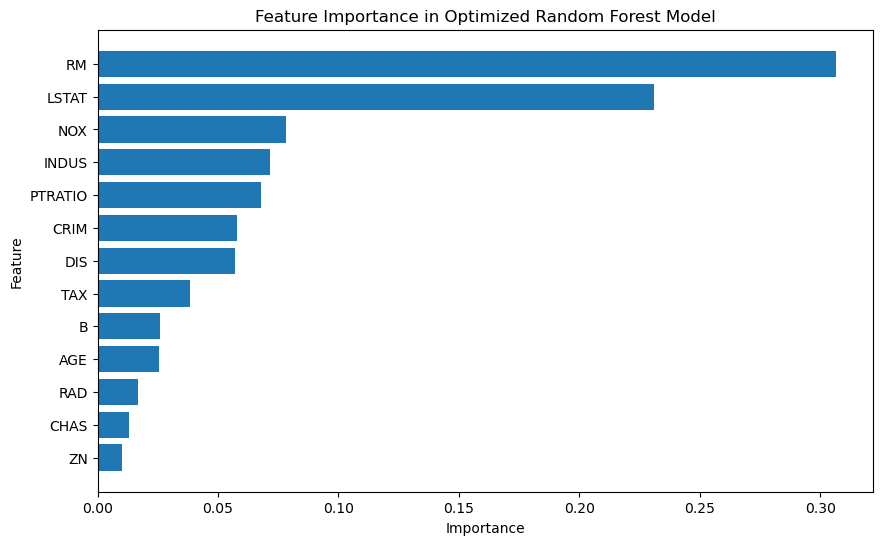

In [37]:
feature_importances = best_rf.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Optimized Random Forest Model')
plt.gca().invert_yaxis()
plt.show()